In [2]:
import os, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dirRun = 'ID1001_POC_Nissan__4_Run'

In [4]:
Prefix = 'test_ID1001_POC_Nissan.ADValue.l'
Suffix = '_Run.csv'

In [5]:
# Getting all result files
Run_files = []
for file in os.listdir(dirRun):
    if file[:len(Prefix)] == Prefix and file[-len(Suffix):] == Suffix:
#         print(file)
        Run_files.append(os.path.join(dirRun,file))
Run_files

['ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l0_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l1_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l2_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l3_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l4_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l5_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l6_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l7_Run.csv']

In [19]:
Run_dfs = []
[Run_dfs.append(pd.read_csv(file, sep = ';')) for file in Run_files];

In [20]:
tcs = pd.concat(Run_dfs)
tcs.shape

(1800, 38)

In [21]:
loopnum_col = list(tcs['LoopNum'])

In [22]:
expgene_col = list(tcs['ExpGene'])

In [23]:
# tcs.dtypes

In [24]:
quanti_params = [col for col in tcs.columns if \
                   (len(tcs[col].unique()) != 1)
                   and ('_num' not in col) 
                   and (tcs[col].dtype in ['int64', 'float64']) \
                   and (col not in ['LoopNum']) \
                   and ('closestdistance' not in col.lower())]
quanti_params

['relativelongitudinaldistance1',
 'relativespeed1',
 'acceleration1',
 'relativelongitudinaldistance2',
 'relativespeed2',
 'acceleration2',
 'acceleration3']

In [25]:
# Conservation des valeurs de paraletres quanti
quanti_df = tcs[['LoopNum', 'ExpGene'] + quanti_params]
quanti_df.head()

,LoopNum,ExpGene,relativelongitudinaldistance1,relativespeed1,acceleration1,relativelongitudinaldistance2,relativespeed2,acceleration2,acceleration3
0,0,Random_InitDOE,10.1,-8,0.8,-50.7,6,0.7,0.5
1,0,Random_InitDOE,64.5,-17,1.5,-73.6,27,0.1,1.6
2,0,Random_InitDOE,59.5,-12,0.0,-5.6,17,-0.7,1.4
3,0,Random_InitDOE,23.8,9,-1.8,-48.0,-10,1.3,0.2
4,0,Random_InitDOE,-76.9,-5,1.9,-73.4,19,-1.4,0.3


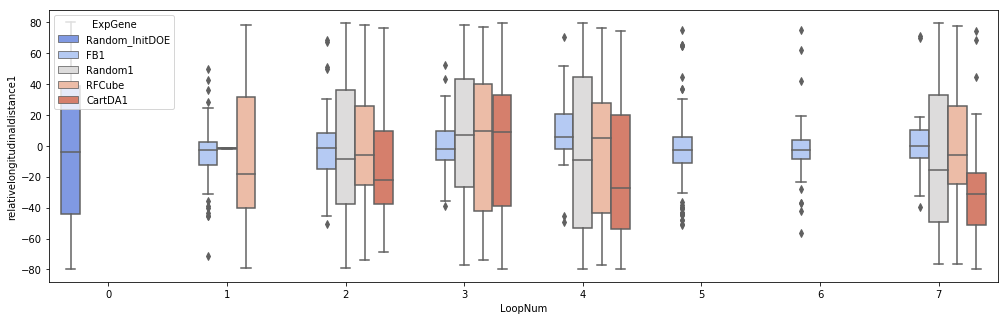

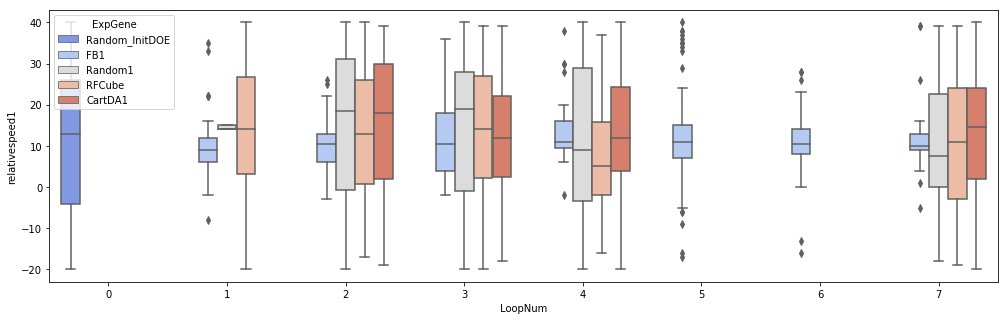

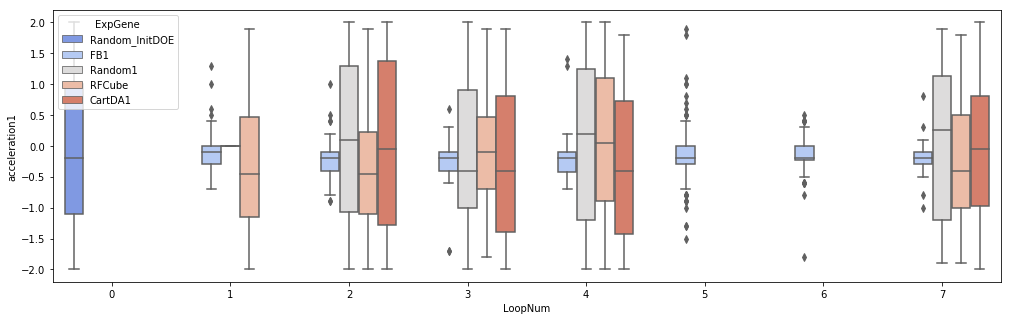

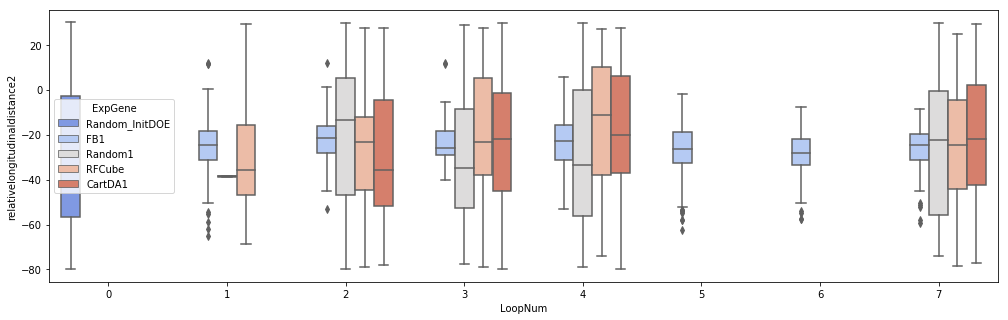

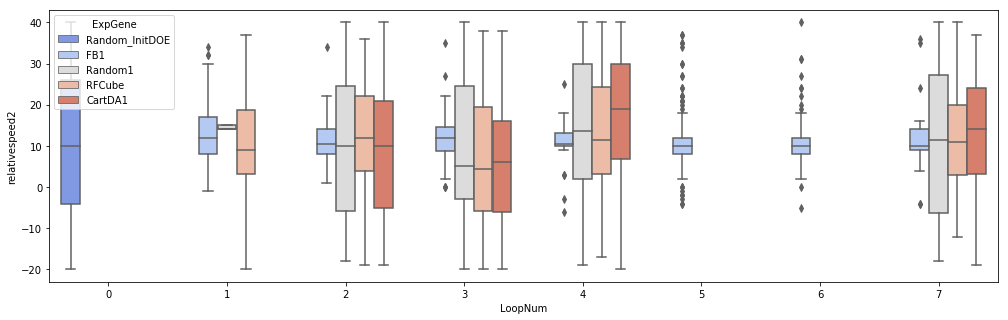

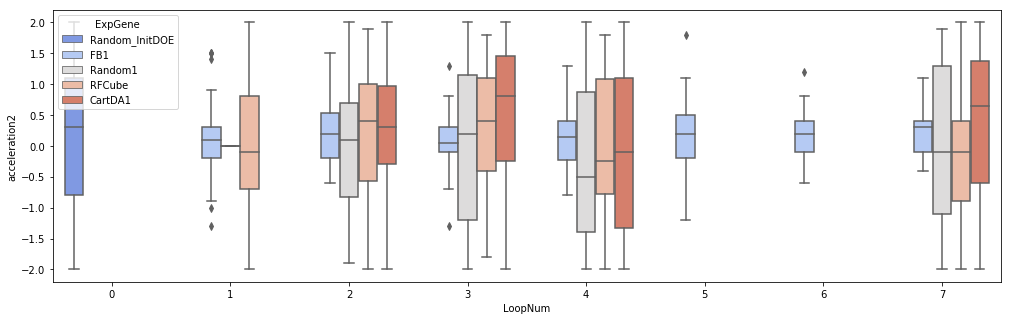

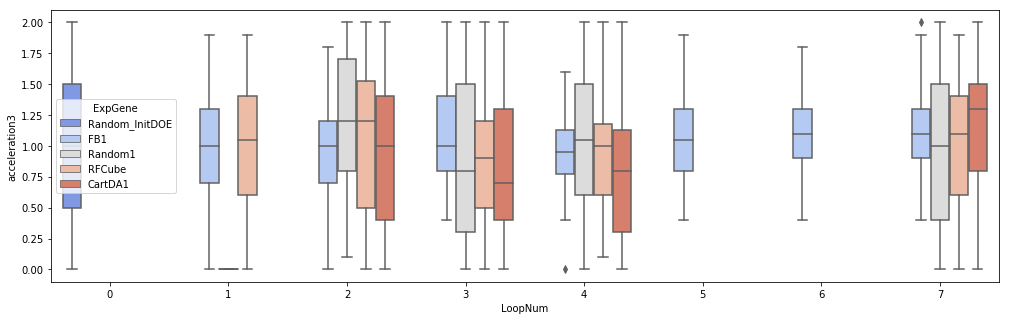

In [26]:
for param in quanti_params[:]:
    plt.figure(figsize=(17,5))
    sns.boxplot(x='LoopNum', y=param, hue='ExpGene', data=tcs, palette='coolwarm')